# 1. 손글씨 데이터셋

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
data= digits['data']
data.shape

(1797, 64)

In [ ]:
target = digits['target']
target.shape

(1797,)

In [ ]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import matplotlib.pyplot as plt

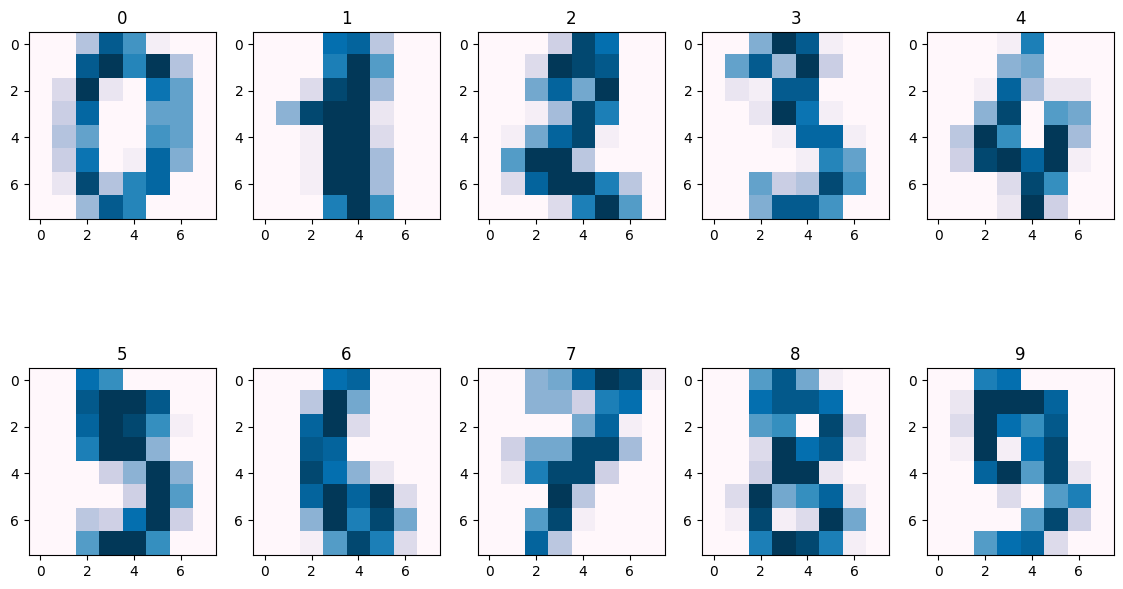

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(data[i].reshape((8,8)), cmap='PuBu')
  ax.set_title(target[i])

In [ ]:
target.shape

(1797,)

In [ ]:
target.shape[0] // 5 # 5로 나눈 몫

359

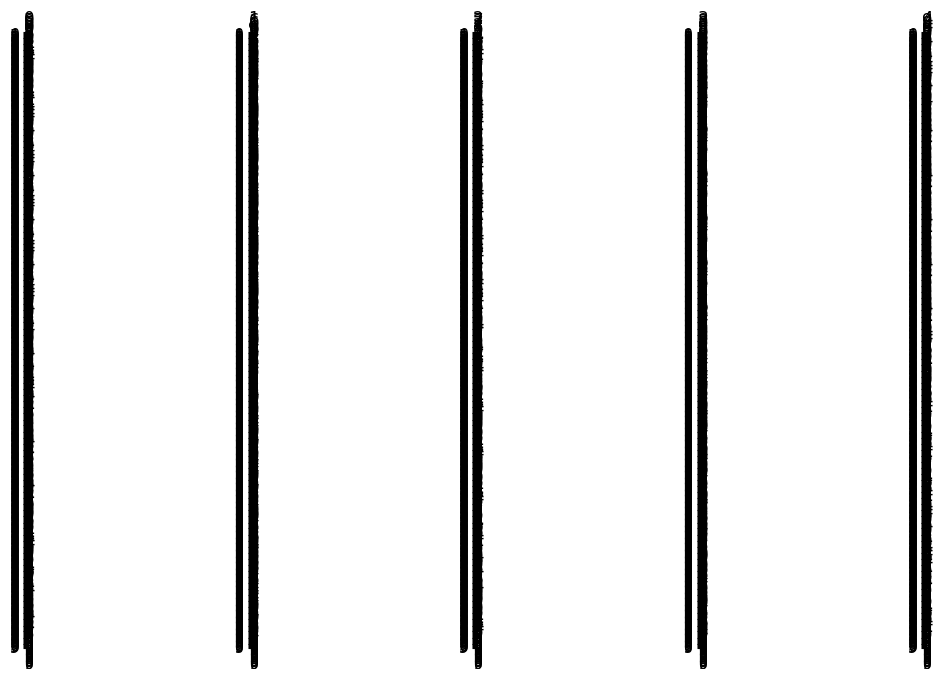

In [ ]:
fig, axes = plt.subplots(target.shape[0] // 5, 5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(data[i].reshape((8,8)),cmap='gray')
  ax.set_title(target[i])

# 2. 스케일링(Scaling)

- 데이터를 특정한 스케일로 통일하는 것
- 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우나 언더플로우를 방지하여 최적화 과정에서의 안정성 및 수렴 속도를 향상
- 데이터를 모델링하기 전에 거치는 것이 좋음(int,float)



### 2-1. 스케일링의 종류
- StandardScaler : 평균과 표준편차를 사용
- MinMaxScaler : 최대, 최소값이 각각 1과 0이 되도록 스케일링
- RobustScaler : 중앙값과 IQR사용(아웃라이어의 영향을 최소화)

In [ ]:
import pandas as pd

In [ ]:
movie = {'naver' : [2,4,6,8,10], 'netflix' : [1,2,3,4,5]}

In [ ]:
movie = pd.DataFrame(data=movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
min_max_scaler = MinMaxScaler()

In [ ]:
min_max_scaler = min_max_scaler.fit_transform(movie)
min_max_scaler

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [ ]:
pd.DataFrame(min_max_scaler, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


### 2-2. 정규화(Normalization)
- 값의 범위(scale)을 0 ~ 1 사이에의 값으로 바꿔주는 것
- 학습 전에 scaling 하는 것
- 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
- scikit-learn에서 MinMaxScaler 사용

### 2-3. 표준화(Standardization)
- 값의 범위(scale)를 평균 0, 분산 1이 되도록 바꿔주는 것
- 학습 전에 scaling 하는 것
- 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
- 정규분포를 표준정규분포로 변환하는 것과 같음
- scikit-learn에서 StandardScaler 사용

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled = scaler.fit_transform(data)
scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(scaled,target, test_size=0.2,random_state=2023)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


# 3. Supper Vector Machine(SVM)
- 두 클래스로부터 최대한 멀리 떨어져 있는 결정 경계를 찾는 분류기로 특정 조건을 만족하는 동시에 클래스를 분류하는 것을목표로 함
<img src="https://i.imgur.com/l1NQNvD.png" width="700px">

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9916666666666667

In [ ]:
print(y_test[10], y_pred[10])

3 3


In [ ]:
plt.imshow(X_test[10], reshape(8,8))
plt.show()

IndexError: ignored

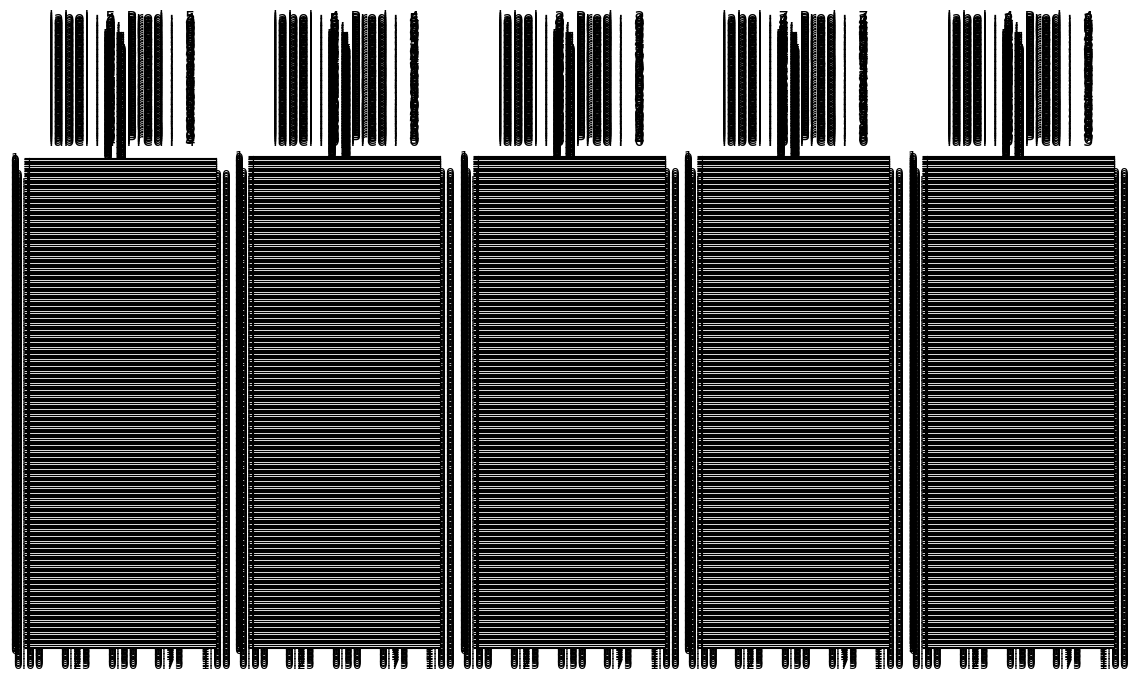

In [ ]:
fig, axes = plt.subplots(target.shape[0] // 5, 5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(data[i].reshape((8,8)),cmap='gray')
  ax.set_title(f'label : {y_test[i]}, Pred :  {y_pred[i]}')